In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.ops import unary_union, polygonize
import osmnx as ox
import neatnet


C:\Users\froum\Github\OpenProceduralCitiesCore\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
dist = 1000

from types import SimpleNamespace

# Define all cities in one namespace
cities = SimpleNamespace(
    barc1=SimpleNamespace(name="Barcelona", coord=(41.381426, 2.173053), crs=25831),
    barc2=SimpleNamespace(name="Barcelona", coord=(41.399434, 2.173053), crs=25831),
)

# Choose the city prefix you want to analyze
selected_city_key = 'barc1'  # Switch to 'ath' or 'barc' etc.

# Create a reference to the selected city
tile1 = getattr(cities, 'barc1')
tile2=getattr(cities, 'barc2')



AttributeError: 'types.SimpleNamespace' object has no attribute 'crs'

Downloaded street network for (41.381426, 2.173053)
Downloaded street network for (41.399434, 2.173053)


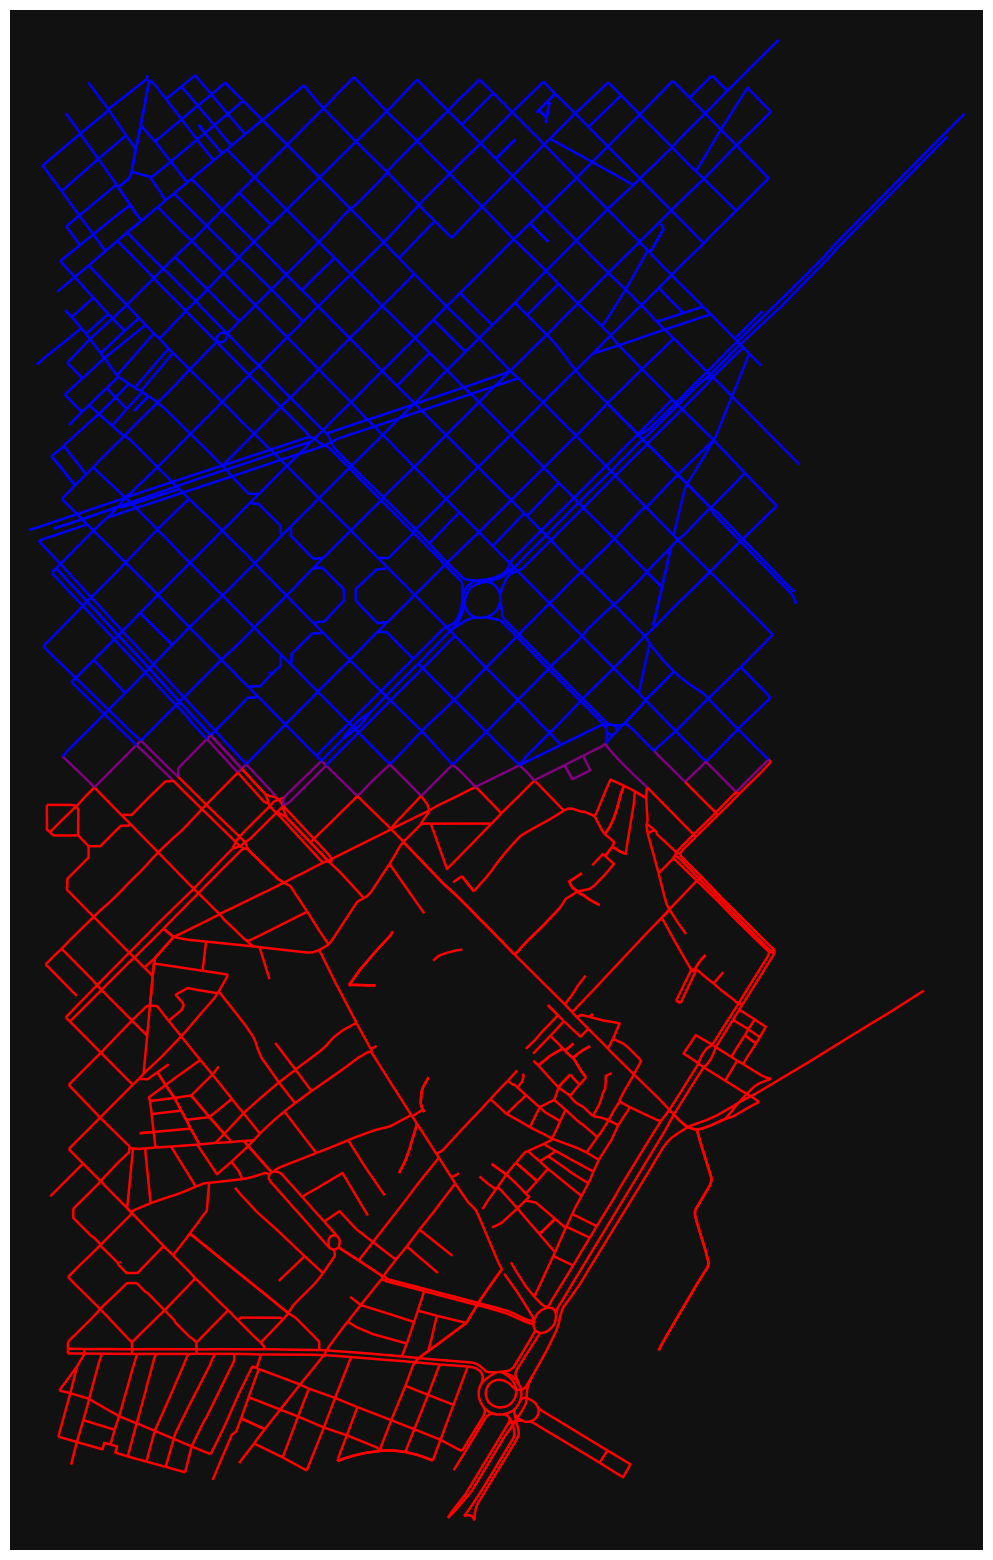

In [73]:
center_point1 = tile1.coord
center_point2 = tile2.coord
local_crs = tile1.crs
custom_filter = (
    '["highway"~"motorway|trunk|primary|secondary|tertiary|footway|pedestrian|path|steps"]'
)

# Download graphs
osm_graph1 = ox.graph.graph_from_point(
    center_point1, 
    dist=dist, 
    dist_type='bbox', 
    network_type='drive',
    simplify=True, 
    retain_all=True, 
    truncate_by_edge=True,
    custom_filter=None
)

print(f"Downloaded street network for {center_point1}")

osm_graph2 = ox.graph.graph_from_point(
    center_point2, 
    dist=dist, 
    dist_type='bbox', 
    network_type='drive',
    simplify=True, 
    retain_all=True, 
    truncate_by_edge=True,
    custom_filter=None
)

print(f"Downloaded street network for {center_point2}")

# Combine the two graphs
combined_graph = nx.compose(osm_graph1, osm_graph2)

# Get edges from both graphs
edges1 = set(osm_graph1.edges(keys=True))
edges2 = set(osm_graph2.edges(keys=True))

# Define color logic
edge_colors = []
for edge in combined_graph.edges(keys=True):
    if edge in edges1 and edge in edges2:
        edge_colors.append("purple")  # Overlapping edge
    elif edge in edges1:
        edge_colors.append("red")
    elif edge in edges2:
        edge_colors.append("blue")
    else:
        edge_colors.append("gray")  # fallback (shouldn’t happen)

# Plot combined graph with color-coded edges
fig, ax = ox.plot_graph(
    combined_graph,
    node_size=0,
    edge_color=edge_colors,
    edge_linewidth=1,
    figsize=(50, 20),
    show=True,
    close=True
)

In [70]:
osm_graph = ox.projection.project_graph(combined_graph, to_crs=local_crs)
streets = ox.graph_to_gdfs(
    ox.convert.to_undirected(osm_graph ),
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True,
).reset_index(drop=True)

In [71]:
simplified = neatnet.neatify(streets)

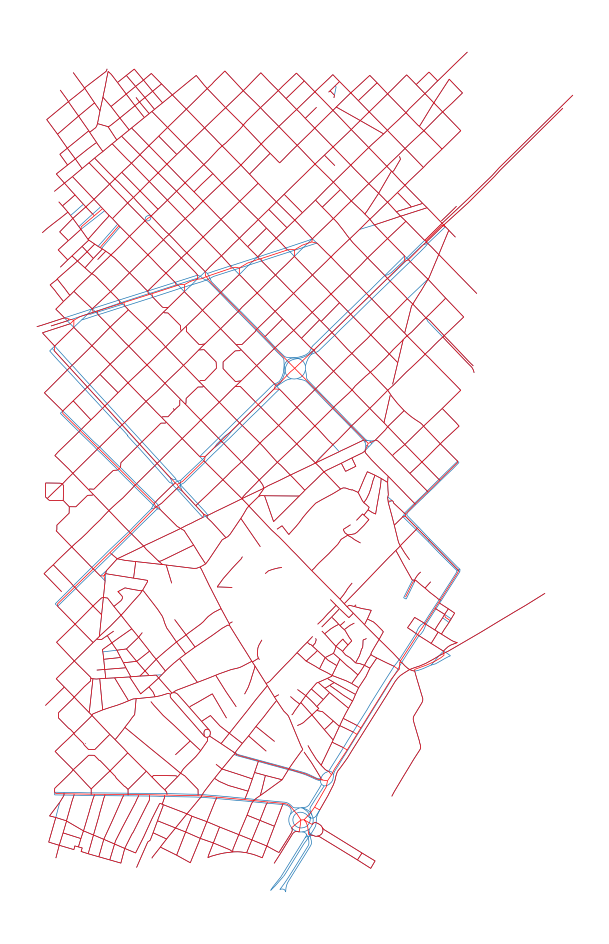

In [72]:
ax = streets.plot(figsize=(12, 12), linewidth=0.5)
simplified.plot(color="red", linewidth=0.5, ax=ax)
ax.set_axis_off()